In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

def plot_function(f, x, a, b):
    plt.grid()
    x_axis = np.linspace(a, b, 100)
    p = lambda f, x, x1 : f.subs(x, x1)
    y_axis = [p(f, x, x1) for x1 in x_axis]
    plt.plot(x_axis, y_axis)

xj = [1, 1.5, 2]
yj = [1.2, 1.3, 2.3]

x = sp.Symbol('x')

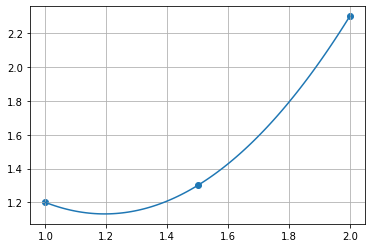

In [4]:
n = len(xj)
v = sp.Matrix(np.vstack([np.ones(n), np.array(xj), np.array(xj)**2]).T)

A = (v.T * v).inv() * (v.T * sp.Matrix(yj))

f = 3.7 - 4.3 * x + 1.8 * x**2

plt.scatter(xj, yj)
plot_function(f, x, min(xj), max(xj))

In [5]:
def regression(f0, x, x0, y0, fator_termos = None):
    v = sp.Matrix(
        [
            [
                float(f0[j].subs(x,x0[i])) 
                for j in range(len(f0))
            ] 
            for i in range(len(x0))
        ]
    )
    A = (v.T * v).inv() * (v.T * sp.Matrix(y0))
    f = 0
    for i in range(len(A)):
        if fator_termos == None:
            f += f0[i] * A[i]
        else:
            f += f0[i] * fator_termos[i](A[i])
    return f


In [6]:
x0 = [1, 1.5, 2]
y0 = [1.2, 1.3, 2.3]
f0 = [x**0, sp.cos(10*x)]

In [10]:
def ex(f0, x, x0, y0):
    f = regression(f0,x,x0,y0)

    plt.scatter(x0, y0)
    plt.title('$f(x)='+sp.latex(f)+'$')
    plot_function(f, x, min(x0), max(x0))

    plt.show()
def ex2(f0, x, x0, y0, fator, fator_terms):
    f = regression(f0,x,x0,y0, fator_terms)
    f = fator(f)

    plt.scatter(x0, y0)
    plt.title('$f(x)='+sp.latex(f)+'$')
    plot_function(f, x, min(x0), max(x0))

    plt.show()

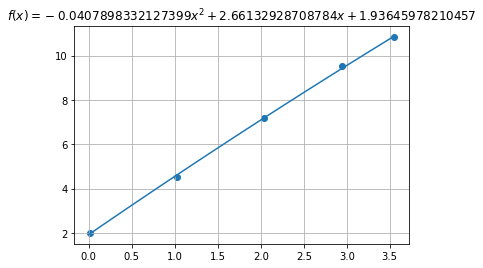

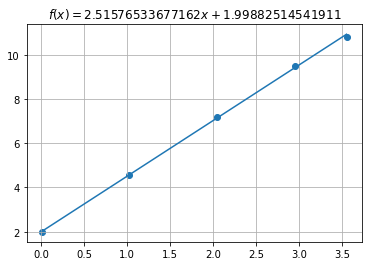

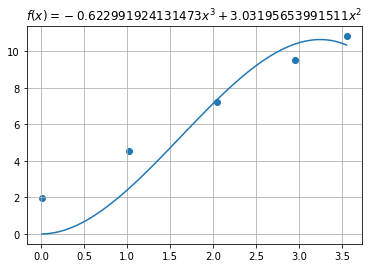

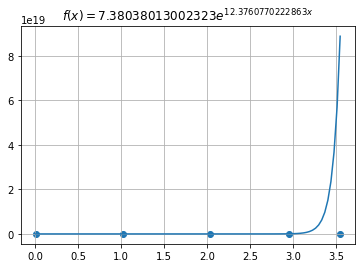

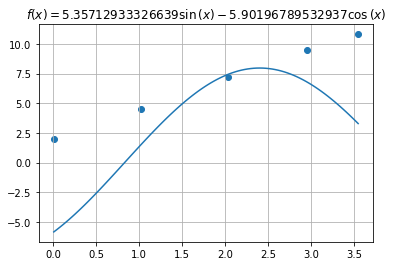

In [11]:
x0 = [0.01, 1.02, 2.04, 2.95, 3.55]
y0 = [1.99, 4.55, 7.20, 9.51, 10.82]
f0 = [x**2, x, x**0]
f1 = [x, x**0]
f2 = [x**2, x**3]
f3 = [x, x**0]
f4 = [sp.cos(x), sp.sin(x)]


ex(f0, x, x0, y0)
ex(f1, x, x0, y0)
ex(f2, x, x0, y0)
ex2(f3, x, x0, y0, lambda x: sp.exp(x), [lambda x: sp.exp(x), lambda x: x])
ex(f4, x, x0, y0)


In [ ]:

f = regression(f0,x,x0,y0)

plt.grid()
plt.scatter(x0, y0)
plt.title('$f(x)='+sp.latex(f)+'$')
plot_function(f, x, 1, 2)

plt.show()